# **Aprendizado de Máquina Supervisionado**

---



# *Este projeto tem por objetivo desenvolver algoritmos de Machine Learning para prever a tendência de gastos de viagens a serviço são solicitados pelo órgãos do Departamento de Polícia Federal ou pelo Instituto Nacional do Seguro Social.*

fonte: Portal da Transparência, site: https://www.portaltransparencia.gov.br/download-de-dados/viagens

# **PRÉ-PROCESSAMENTO**

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
viagem = pd.read_csv('/content/drive/MyDrive/Trabalho_Topicos/Viagem_limpo.csv',
                    sep=',', encoding='utf-8')

In [6]:
viagem.head()

,id_viagem,orgao_solicitante,nome,cargo,funcao,data_ini,data_fim,motivo,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
0,12463176,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,Sigilosa,04/01/2016,26/02/2016,Informação protegida por sigilo nos termos da ...,8791.50,0.0,0.0,0.0,8791.50
1,12463177,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,Sigilosa,01/01/2016,31/01/2016,Informação protegida por sigilo nos termos da ...,6139.20,0.0,0.0,0.0,6139.20
2,12463178,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,Sigilosa,01/01/2016,11/01/2016,Informação protegida por sigilo nos termos da ...,1822.08,0.0,0.0,0.0,1822.08
3,12463180,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,Sigilosa,01/01/2016,11/01/2016,Informação protegida por sigilo nos termos da ...,1715.40,0.0,0.0,0.0,1715.40
4,12463181,Departamento de Polícia Federal,Informações protegidas por sigilo,Informações protegidas por sigilo,Sigilosa,11/01/2016,15/01/2016,Informação protegida por sigilo nos termos da ...,919.45,0.0,0.0,0.0,919.45


In [ ]:
viagem.describe()

,id_viagem,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
count,8.543700e+05,854370.000000,854370.000000,8.543700e+05,854370.000000,8.543700e+05
mean,1.841664e+07,1158.550487,431.260704,1.914205e+01,5.164900,1.614118e+03
std,1.042799e+08,4621.228568,1085.081525,1.841412e+03,39.865532,5.235432e+03
min,1.246318e+07,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.272020e+07,85.380000,0.000000,0.000000e+00,0.000000,1.849100e+02
50%,1.297258e+07,380.040000,0.000000,0.000000e+00,0.000000,5.367900e+02
75%,1.322692e+07,772.220000,593.720000,0.000000e+00,0.000000,1.497690e+03
max,2.017001e+09,93715.600000,134098.000000,1.691843e+06,6062.420000,1.710951e+06


## Gerando filtros para criar amostra

In [ ]:
viagem['orgao_solicitante'].value_counts()

Departamento de Polícia Federal                      66990
Instituto Nacional do Seguro Social                  65809
Ministério da Saúde - Unidades com vínculo direto    42270
Comando da Aeronáutica                               39715
Departamento de Polícia Rodoviária Federal           36774
                                                     ...  
Fundação Escola Nacional de Administração Pública      112
Empresa de Planejamento e Logística S.A.                89
Fundação Biblioteca Nacional                            68
Instituto Federal de Brasília                           55
Instituto Nacional de Tecnologia da Informação          38
Name: orgao_solicitante, Length: 190, dtype: int64

In [ ]:
viagem['nome'].value_counts()

Informações protegidas por sigilo    109744
SAUL ALBERTO SILVEIRA TEIXEIRA          221
LEANDRO JONES BAZZANELLA                213
JOAO BATISTA DA SILVA                   198
NARCISO CEZAR RIBEIRO PROTETTI          197
                                      ...  
KLEBERT DE LIMA SILVA                     1
JOSE RAIMUNDO SANTOS MADEIRA              1
ANA PAULA MUSSI SZABO CHEROBIM            1
JOSE FRANCIEL VIEIRA ERICEIRA             1
PAULO JUNIOR RODRIGUES PEREIRA            1
Name: nome, Length: 216635, dtype: int64

In [ ]:
viagem['cargo'].value_counts()

Desconhecido                             184362
Informações protegidas por sigilo        109744
PROFESSOR DO MAGISTERIO SUPERIOR          77027
PROFESSOR ENS BASICO TECN TECNOLOGICO     54558
TECNICO DO SEGURO SOCIAL                  20672
                                          ...  
ANALISTA IV                                   1
AGENTE ANALISTA GRAF FIS SUP                  1
AGENTE DE SERVICOS RGERAIS                    1
ENGENHEIRO MECANICO-ESPECIALIDADE             1
CIRURGIAO DENTISTA                            1
Name: cargo, Length: 917, dtype: int64

In [ ]:
viagem['funcao'].value_counts()

-1            744104
Sigilosa      109744
Sargento         101
Praças            68
Suboficial        47
OfSubalter        41
OfSuperior        41
OfIntermed        27
DAS-1015          22
DAS-1014          14
DAS-1022          11
FPE-1024          10
CD-0004           10
FCI-0001           9
CNE-0001           8
FGR-3              8
FPE-1022           8
DAS-1016           7
FGR-1              7
FG-0002            7
NES-0008           7
FG-0001            6
CD-0003            6
DAS-1011           6
DAS-1024           6
FUC-0001           5
FG-0003            4
DAS-1012           4
DAS-1023           4
FGR-2              4
FPE-1014           4
DAS-1013           3
FG-0004            2
DAS-1025           2
FPE-1023           2
FCD-2              2
CD-0002            2
Subtenente         1
FCI-0002           1
CD-0001            1
FCT-13             1
Of.General         1
FG-0005            1
FG-0007            1
Name: funcao, dtype: int64

In [ ]:
viagem['motivo'].value_counts()


Informação protegida por sigilo nos termos da legislação vigente                                                                                                                                                                                                                                                                                                                                             109744
Jogos Olímpicos e Paralímpicos de 2016 - Simultânea.    Conforme Convênio de Cooperação Federativa, prestar apoio ao Departamento da Força Nacional de Segurança Pública e ao SENASP, na segurança interna e externa das instalações esportivas dos JOGOS OLÍMPICOS E PARAOLÍMPICOS RIO 2016.                                                                                                                  1715
Jogos Olímpicos e Paralímpicos de 2016 - Simultânea.     Conforme Convênio de Cooperação Federativa, prestar apoio ao Departamento da Força Nacional de Segurança Pública e ao SENASP, na segura

Filtrando - Orgão Solicitante:

*   Departamento de Polícia Federal
*   Instituto Nacional do Seguro Social

In [ ]:
viagem = viagem[viagem['orgao_solicitante'].isin(['Departamento de Polícia Federal', 'Instituto Nacional do Seguro Social'])]

In [ ]:
viagem.shape

(132799, 13)

In [ ]:
viagem.describe()

,id_viagem,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
count,1.327990e+05,132799.000000,132799.000000,132799.000000,132799.000000,132799.000000
mean,1.296928e+07,1340.173250,208.260593,12.056909,10.955538,1571.446290
std,2.888989e+05,4076.734971,678.562638,165.485301,40.938319,4301.911498
min,1.246318e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.272277e+07,67.680000,0.000000,0.000000,0.000000,85.380000
50%,1.295614e+07,259.260000,0.000000,0.000000,0.000000,280.080000
75%,1.322244e+07,734.040000,0.000000,0.000000,0.000000,935.240000
max,1.367596e+07,79266.220000,25110.570000,27472.620000,3061.420000,82690.830000


In [ ]:
viagem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132799 entries, 0 to 851244
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_viagem             132799 non-null  int64  
 1   orgao_solicitante     132799 non-null  object 
 2   nome                  132799 non-null  object 
 3   cargo                 132799 non-null  object 
 4   funcao                132799 non-null  object 
 5   data_ini              132799 non-null  object 
 6   data_fim              132799 non-null  object 
 7   motivo                132799 non-null  object 
 8   valor_diarias         132799 non-null  float64
 9   valor_passagens       132799 non-null  float64
 10  valor_devolucao       132799 non-null  float64
 11  valor_outros_ gastos  132799 non-null  float64
 12  valor_total           132799 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 14.2+ MB


Identificando variável categórica que será o Alvo de nosso estudo.

In [ ]:
viagem['orgao_solicitante'].value_counts()


Departamento de Polícia Federal        66990
Instituto Nacional do Seguro Social    65809
Name: orgao_solicitante, dtype: int64

Reduzido o DF de 12 para 6 colunas

In [ ]:
df = viagem[['orgao_solicitante', 'valor_diarias', 'valor_passagens', 'valor_devolucao', 'valor_outros_ gastos', 'valor_total']]
df

,orgao_solicitante,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
0,Departamento de Polícia Federal,8791.50,0.0,0.0,0.0,8791.50
1,Departamento de Polícia Federal,6139.20,0.0,0.0,0.0,6139.20
2,Departamento de Polícia Federal,1822.08,0.0,0.0,0.0,1822.08
3,Departamento de Polícia Federal,1715.40,0.0,0.0,0.0,1715.40
4,Departamento de Polícia Federal,919.45,0.0,0.0,0.0,919.45
...,...,...,...,...,...,...
850941,Departamento de Polícia Federal,380.04,0.0,0.0,0.0,380.04
850943,Departamento de Polícia Federal,223.86,0.0,0.0,0.0,223.86
850944,Departamento de Polícia Federal,223.86,0.0,0.0,0.0,223.86
851243,Departamento de Polícia Federal,223.86,0.0,0.0,0.0,223.86


## **Transformando as variáveis categóricas nominais em variáveis categóricas ordinais**
Coluna orgao_solicitante


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2 = pd.DataFrame.copy(df)

In [ ]:
df2['orgao_solicitante'].replace({'Departamento de Polícia Federal': 0, 'Instituto Nacional do Seguro Social': 1}, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132799 entries, 0 to 851244
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   orgao_solicitante     132799 non-null  int64  
 1   valor_diarias         132799 non-null  float64
 2   valor_passagens       132799 non-null  float64
 3   valor_devolucao       132799 non-null  float64
 4   valor_outros_ gastos  132799 non-null  float64
 5   valor_total           132799 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 7.1 MB


In [ ]:
df['orgao_solicitante'] = df2['orgao_solicitante']
df.head()

,orgao_solicitante,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
0,0,8791.50,0.0,0.0,0.0,8791.50
1,0,6139.20,0.0,0.0,0.0,6139.20
2,0,1822.08,0.0,0.0,0.0,1822.08
3,0,1715.40,0.0,0.0,0.0,1715.40
4,0,919.45,0.0,0.0,0.0,919.45


In [ ]:
df.dtypes

orgao_solicitante         int64
valor_diarias           float64
valor_passagens         float64
valor_devolucao         float64
valor_outros_ gastos    float64
valor_total             float64
dtype: object

## **LEGENDA**

Orgao Solicitante = (0 = Departamento de Polícia Federal, 1 = Instituto Nacional do Seguro Social)

valor_diarias = Valor gasto em diárias

valor_passagens = Valor gasto com passagens

valor_devolucao = Valor devolvido

valor_outros_ gastos = Valor gasto com outros gastos

valor_total = Gasto total


## **ATRIBUTOS PREVISORES E ALVO**



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132799 entries, 0 to 851244
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   orgao_solicitante     132799 non-null  int64  
 1   valor_diarias         132799 non-null  float64
 2   valor_passagens       132799 non-null  float64
 3   valor_devolucao       132799 non-null  float64
 4   valor_outros_ gastos  132799 non-null  float64
 5   valor_total           132799 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 7.1 MB


Previsores serão as colunas: valor_diarias, valor_passagens, valor_devolucao, valor_outros_ gastos, valor_total.


In [ ]:
previsores = df.iloc[:, 1:5].values

In [ ]:
previsores

array([[8791.5 ,    0.  ,    0.  ,    0.  ],
       [6139.2 ,    0.  ,    0.  ,    0.  ],
       [1822.08,    0.  ,    0.  ,    0.  ],
       ...,
       [ 223.86,    0.  ,    0.  ,    0.  ],
       [ 223.86,    0.  ,    0.  ,    0.  ],
       [ 223.86,    0.  ,    0.  ,    0.  ]])

In [ ]:
previsores.shape

(132799, 4)

Alvo será a coluna orgao_solicitante.

In [ ]:
alvo = df.iloc[:, 0].values

In [ ]:
alvo

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
alvo.shape

(132799,)

## **Análise das escalas dos atributos (Escalonamento)**

Padronização (utiliza a média e o desvio padrão como referência).

In [ ]:
df.describe()

,orgao_solicitante,valor_diarias,valor_passagens,valor_devolucao,valor_outros_ gastos,valor_total
count,132799.000000,132799.000000,132799.000000,132799.000000,132799.000000,132799.000000
mean,0.495553,1340.173250,208.260593,12.056909,10.955538,1571.446290
std,0.499982,4076.734971,678.562638,165.485301,40.938319,4301.911498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,67.680000,0.000000,0.000000,0.000000,85.380000
50%,0.000000,259.260000,0.000000,0.000000,0.000000,280.080000
75%,1.000000,734.040000,0.000000,0.000000,0.000000,935.240000
max,1.000000,79266.220000,25110.570000,27472.620000,3061.420000,82690.830000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [ ]:
previsores_esc

array([[ 1.82777513, -0.30691548, -0.07285816, -0.26761184],
       [ 1.17717852, -0.30691548, -0.07285816, -0.26761184],
       [ 0.11820944, -0.30691548, -0.07285816, -0.26761184],
       ...,
       [-0.27382635, -0.30691548, -0.07285816, -0.26761184],
       [-0.27382635, -0.30691548, -0.07285816, -0.26761184],
       [-0.27382635, -0.30691548, -0.07285816, -0.26761184]])

In [ ]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3
0,1.827775,-0.306915,-0.072858,-0.267612
1,1.177179,-0.306915,-0.072858,-0.267612
2,0.118209,-0.306915,-0.072858,-0.267612
3,0.092041,-0.306915,-0.072858,-0.267612
4,-0.103201,-0.306915,-0.072858,-0.267612
...,...,...,...,...
132794,-0.235516,-0.306915,-0.072858,-0.267612
132795,-0.273826,-0.306915,-0.072858,-0.267612
132796,-0.273826,-0.306915,-0.072858,-0.267612
132797,-0.273826,-0.306915,-0.072858,-0.267612


## **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (orgao_solicitante).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

## **BASE DE TREINO E TESTE**

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape

(92959, 4)

In [ ]:
x_teste.shape

(39840, 4)

In [ ]:
y_treino.shape

(92959,)

In [ ]:
y_teste.shape

(39840,)

# **ÁRVORE DE DECISÃO**

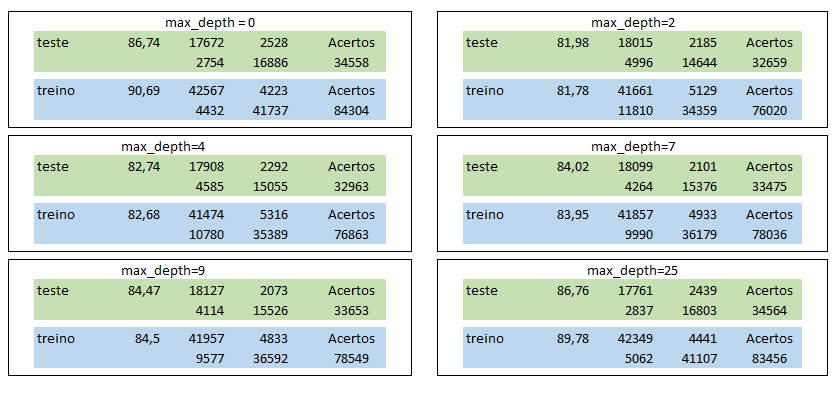
<br>Realizada diversas testagens do parâmetro max_depth, optou-se por utilizar o 25 que apresentou-se um melhor cenário de previsão.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=25)
_arvore = arvore.fit(x_treino, y_treino)
# max_depth é o parametro que poda a arvore.
# ele equilibra o cenário de overfitting (chegando no best Fit) o ideal é ter uma acuracia parecida do treino e do teste.

In [ ]:
#tree.plot_tree(_arvore)

## Análise dados de TESTE

In [ ]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_teste
# meu array real (que o de cima deveria ter previsto)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia no conjunto de TESTE de: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))


Acurácia no conjunto de TESTE de: 86.76%


NA MATRIX DE CONFUSÃO DE TESTE:

**Resultado**

**Acertou:** 17761 previu ser gastos do INSS; 16803 previu ser gasto da PF.

**Errou:** 2439 previu ser gasto do INSS; 2837 previu ser gasto da PF.

In [ ]:
confusion_matrix(y_teste, previsoes_arvore)

array([[17761,  2439],
       [ 2837, 16803]])

In [ ]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     20200
           1       0.87      0.86      0.86     19640

    accuracy                           0.87     39840
   macro avg       0.87      0.87      0.87     39840
weighted avg       0.87      0.87      0.87     39840



## Análise dados de TREINO

In [ ]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print("Acurácia no conjunto de TREINO de: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0 ))

Acurácia no conjunto de TREINO de: 89.78%


NA MATRIX DE CONFUSÃO DE TREINO:

**Resultado**

**Acertou:** 42349 previu ser gasto do INSS, 41107 previu ser gasto da PF.

**Errou:** 4441 previu ser gsto do INSS, 5062 previu ser gasto da PF.

In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[42349,  4441],
       [ 5062, 41107]])

### Árvore de decisão = 89.78% (treino) e 86.76% (teste) - 34.564 acertos


# **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=25)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=25, n_estimators=150,
                       random_state=0)

In [ ]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_teste

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia de teste: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia de teste: 86.88%


In [ ]:
confusion_matrix(y_teste, previsoes_random)

array([[17936,  2264],
       [ 2962, 16678]])

In [ ]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     20200
           1       0.88      0.85      0.86     19640

    accuracy                           0.87     39840
   macro avg       0.87      0.87      0.87     39840
weighted avg       0.87      0.87      0.87     39840



Análise dados de treino

In [ ]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print("Acurácia de treino: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) * 100.0 ))

Acurácia de treino: 89.83%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[42526,  4264],
       [ 5186, 40983]])

### Random Forest = 89.83% (treino) e 86.88% (teste) - 34.614 acertos

# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=2,solver="lbfgs")
logistica.fit(x_treino, y_treino)
# C é quão fino fica sua curva S, default = 1
# penalty função que muda  ajuste do erro (distancia) l1, l2

LogisticRegression(C=2, max_iter=500, random_state=1)

In [ ]:
logistica.intercept_

array([0.46214356])

In [ ]:
logistica.coef_

array([[-2.43931767, -0.12733166,  0.09704853,  4.73215461]])

In [ ]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Acurácia de TESTE: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia de TESTE: 73.57%


In [ ]:
confusion_matrix(y_teste, previsoes_logistica)

array([[20001,   199],
       [10329,  9311]])

In [ ]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79     20200
           1       0.98      0.47      0.64     19640

    accuracy                           0.74     39840
   macro avg       0.82      0.73      0.72     39840
weighted avg       0.82      0.74      0.72     39840



Análise dados de treino

In [ ]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
print("Acurácia de TREINO: %.2f%%" % (accuracy_score(y_treino, previsoes_treino) *100.0))

Acurácia de TREINO: 73.69%


In [ ]:
confusion_matrix(y_treino, previsoes_treino)

array([[46266,   524],
       [23930, 22239]])

### Regressão Logística = 73.69% (treino) e 73.57% (teste) - 29.312 acertos

# CONCLUSÃO

o Algorítimo que apresentou o melhor resultado foi o Random Forests, 34.614 acertos,
comprovando a expectativa de ser o mais robusto, complexo e propiciando resultados melhores.​